<a href="https://colab.research.google.com/github/junior8801/Estudos_DS/blob/master/CaiNaFolia_Ermivaldo_Junior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1>**Análise de Chatbot "Cai na Folia"**</h1>
####Case técnico sobre análise de dados de mensagens do Chatbot desenvolvido para atendimento para os usuários do carnaval de Belo Horizonte em 2018.
<br>

##Análise

####Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
datetime.datetime.strptime

from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image


%matplotlib inline
%config InlineBackend.figure_format='svg'

from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


###Loading

####df_messages

In [ ]:
df_messages = pd.read_csv('/gdrive/My Drive/Chatbot-CaiNaFolia/DadosBrutosMessages.csv',sep=';',)
df_messages.head()

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator
0,\n73719,2018-02-02 13:51:58.78 -02:00,1454345038013757@messenger.gw.msging.net,carnabelo@msging.net,comecar,User
1,\n73722,2018-02-02 13:52:00.92 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,"E ai Alan Pierre, o carnaval de BH já começou 🎉 🎭",Bot
2,\n73723,2018-02-02 13:52:03.90 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,"Se você não sabe onde ir, posso te ajudar com ...",Bot
3,\n73726,2018-02-02 13:52:10.64 -02:00,1454345038013757@messenger.gw.msging.net,carnabelo@msging.net,beber,User
4,\n73729,2018-02-02 13:52:12.07 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,🎵 Você pensa que cachaça é água?\nCachaça não ...,Bot


In [ ]:
df_messages.shape

(33767, 6)

In [ ]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33767 entries, 0 to 33766
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MessageSequentialID  33767 non-null  object
 1   StorageDate          33766 non-null  object
 2   FromIdentity         33766 non-null  object
 3   ToIdentity           33766 non-null  object
 4   Message              33766 non-null  object
 5   MessageOriginator    33766 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


####df_events

In [ ]:
df_events = pd.read_csv("/gdrive/My Drive/Chatbot-CaiNaFolia/DadosBrutosEventTracks.csv",sep=";")
df_events.head()

,EventTrackSequentialID,OwnerIdentity,StorageDate,Category,Action
0,100,carnabelo@msging.net,2018-02-02 13:51:59.72 -02:00,Flow,Boas vindas
1,101,carnabelo@msging.net,2018-02-02 13:52:10.89 -02:00,Flow,Objetivo - Beber
2,102,carnabelo@msging.net,2018-02-02 13:52:10.98 -02:00,Objetivo,Beber
3,103,carnabelo@msging.net,2018-02-02 13:52:13.15 -02:00,Flow,Intro
4,104,carnabelo@msging.net,2018-02-02 13:52:17.34 -02:00,Flow,Menu


In [ ]:
df_events.shape

(52900, 5)

In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52900 entries, 0 to 52899
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EventTrackSequentialID  52900 non-null  int64 
 1   OwnerIdentity           52900 non-null  object
 2   StorageDate             52900 non-null  object
 3   Category                52900 non-null  object
 4   Action                  52900 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


###Data Preparation

####df_messages

In [ ]:
##Valores nulos/faltantes
df_messages_missing_values = df_messages.isnull().sum()
for i in range(len(df_messages_missing_values)):
    print("Missing rows in {} : {}".format(df_messages_missing_values.index[i], df_messages_missing_values.values[i]))

Missing rows in MessageSequentialID : 0
Missing rows in StorageDate : 1
Missing rows in FromIdentity : 1
Missing rows in ToIdentity : 1
Missing rows in Message : 1
Missing rows in MessageOriginator : 1


In [ ]:
##Exibir linha com valor vazio
df_messages[df_messages.Message.isnull()]

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator
33766,\n,NaN,NaN,NaN,NaN,NaN


In [ ]:
##Remover última linha do data frame
df_messages = df_messages[:-1]
df_messages[df_messages.Message.isnull()]

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator


In [ ]:
##remover caracteres /n da coluna MessageSequentialID
df_messages['MessageSequentialID'] = df_messages['MessageSequentialID'].str.extract('(\d+)', expand=False)
df_messages.head()

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator
0,73719,2018-02-02 13:51:58.78 -02:00,1454345038013757@messenger.gw.msging.net,carnabelo@msging.net,comecar,User
1,73722,2018-02-02 13:52:00.92 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,"E ai Alan Pierre, o carnaval de BH já começou 🎉 🎭",Bot
2,73723,2018-02-02 13:52:03.90 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,"Se você não sabe onde ir, posso te ajudar com ...",Bot
3,73726,2018-02-02 13:52:10.64 -02:00,1454345038013757@messenger.gw.msging.net,carnabelo@msging.net,beber,User
4,73729,2018-02-02 13:52:12.07 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,🎵 Você pensa que cachaça é água?\nCachaça não ...,Bot


In [ ]:
#quantidade de mensagens únicas
len(df_messages.Message.unique().tolist())

3310

In [ ]:
##Mesages
messages = df_messages.Message.unique()


In [ ]:
##Cconverter coluna StorageDate em datetime
df_messages['StorageDateDateTime'] = pd.to_datetime(df_messages['StorageDate'].str[:-7])
df_messages.sort_values('StorageDateDateTime',ascending=True,inplace=True)

In [ ]:
##Adicionar coluna apenas com a data
df_messages['StorageDateDay'] = df_messages['StorageDateDateTime'].dt.strftime("%Y-%m-%d")

####df_events

In [ ]:
df_events.shape

(52900, 5)

In [ ]:
df_events.head()

,EventTrackSequentialID,OwnerIdentity,StorageDate,Category,Action
0,100,carnabelo@msging.net,2018-02-02 13:51:59.72 -02:00,Flow,Boas vindas
1,101,carnabelo@msging.net,2018-02-02 13:52:10.89 -02:00,Flow,Objetivo - Beber
2,102,carnabelo@msging.net,2018-02-02 13:52:10.98 -02:00,Objetivo,Beber
3,103,carnabelo@msging.net,2018-02-02 13:52:13.15 -02:00,Flow,Intro
4,104,carnabelo@msging.net,2018-02-02 13:52:17.34 -02:00,Flow,Menu


In [ ]:
##Cconverter coluna StorageDate em datetime
df_events['StorageDateDateTime'] = pd.to_datetime(df_messages['StorageDate'].str[:-7])
df_events.sort_values('StorageDateDateTime',ascending=True)

,EventTrackSequentialID,OwnerIdentity,StorageDate,Category,Action,StorageDateDateTime
0,100,carnabelo@msging.net,2018-02-02 13:51:59.72 -02:00,Flow,Boas vindas,2018-02-02 13:51:58.780
1,101,carnabelo@msging.net,2018-02-02 13:52:10.89 -02:00,Flow,Objetivo - Beber,2018-02-02 13:52:00.920
2,102,carnabelo@msging.net,2018-02-02 13:52:10.98 -02:00,Objetivo,Beber,2018-02-02 13:52:03.900
3,103,carnabelo@msging.net,2018-02-02 13:52:13.15 -02:00,Flow,Intro,2018-02-02 13:52:10.640
4,104,carnabelo@msging.net,2018-02-02 13:52:17.34 -02:00,Flow,Menu,2018-02-02 13:52:12.070
...,...,...,...,...,...,...
52895,62980,carnabelo@msging.net,2018-02-27 09:16:34.80 -03:00,Flow,API - Carrossel blocos - Agenda,NaT
52896,62981,carnabelo@msging.net,2018-02-27 09:16:34.87 -03:00,Pesquisa - Bairro,Santa Rosa,NaT
52897,62982,carnabelo@msging.net,2018-02-27 10:17:09.71 -03:00,Flow,Respostas para carrossel,NaT
52898,62983,carnabelo@msging.net,2018-02-27 10:17:09.87 -03:00,Flow,Compartilhar - Intro,NaT


###EDA

####Entendendo os dados

In [ ]:
##Quantidade de mensagens
df_messages.shape

(33764, 6)

In [ ]:
##Quantidade de mensagens enviadas agrupadas por quem enviou
df_messages.MessageOriginator.value_counts()

Bot     22742
User    11022
Name: MessageOriginator, dtype: int64

O Chatbot enviou um total de 22.742, enquanto que os usuários enviaram 11.022 mensagens apenas.

In [ ]:
#Separando as mensagens enviadas pelos usuários
df_messages_user = df_messages[df_messages.MessageOriginator=='User']
df_messages_user.head()

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator
0,73719,2018-02-02 13:51:58.78 -02:00,1454345038013757@messenger.gw.msging.net,carnabelo@msging.net,comecar,User
3,73726,2018-02-02 13:52:10.64 -02:00,1454345038013757@messenger.gw.msging.net,carnabelo@msging.net,beber,User
7,73735,2018-02-02 13:52:24.46 -02:00,1454345038013757@messenger.gw.msging.net,carnabelo@msging.net,MenuAgenda,User
8,73738,2018-02-02 13:52:35.18 -02:00,1454345038013757@messenger.gw.msging.net,carnabelo@msging.net,10/02/2018,User
11,73802,2018-02-02 13:53:00.02 -02:00,1454345038013757@messenger.gw.msging.net,carnabelo@msging.net,qual o seu nome,User


In [ ]:
df_messages_user_group.count()

1100

Tivemos 1.100 usuários utilizando o Chatbot.

In [ ]:
##Quantidade de mensagens enviadas por usuários
df_messages_user_group = df_messages_user['FromIdentity'].value_counts()
df_messages_user_group.head(10)

2132001316817479@messenger.gw.msging.net    550
1767958763279497@messenger.gw.msging.net    135
1775489765818948@messenger.gw.msging.net     81
1595484337207652@messenger.gw.msging.net     77
1298966690205449@messenger.gw.msging.net     76
2111280855556324@messenger.gw.msging.net     76
2289157887776255@messenger.gw.msging.net     67
1802284043179412@messenger.gw.msging.net     63
1680552578673715@messenger.gw.msging.net     63
1386097128167419@messenger.gw.msging.net     58
Name: FromIdentity, dtype: int64

O usuário 2132001316817479@messenger.gw.msging.net foi o que mais enviou mensagens na plataforma, sendo um total de 550 mensagens.

In [ ]:
df_messages_user_group.describe()

count    1103.000000
mean        9.992747
std        19.383791
min         1.000000
25%         4.000000
50%         6.000000
75%        12.000000
max       550.000000
Name: FromIdentity, dtype: float64

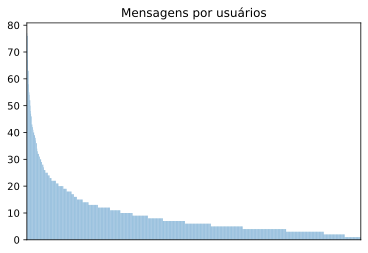

In [ ]:
##Ditribuição da quantidade de mensagens por usuário
##Removido outliers com 550 e 135 mensagens, para facilitar a visualização dos gráficos.
df_messages_user_group = df_messages_user_group[2:]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
plt.title('Mensagens por usuários')
df_messages_user_group.plot.bar(y="FromIdentity")
plt.show()

Podemos observar que poucos usuários enviaram mais do que 20 mensagens.

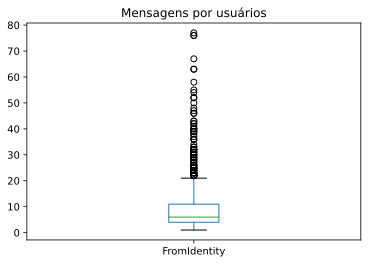

In [ ]:
df_messages_user_group.plot(kind='box')
plt.title("Mensagens por usuários")
plt.show()

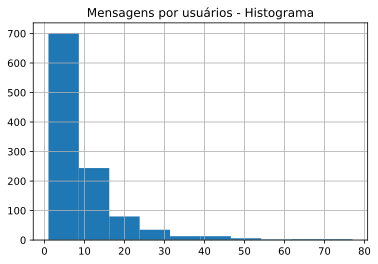

In [ ]:
df_messages_user_group.hist()
plt.title('Mensagens por usuários - Histograma')
plt.show()

No histograma acima confirmamos que cerca de 63% dos usuários enviaram até 10 mensagens.

In [ ]:
##Quantidade de mensagens enviadas por dia
df_messages_day = df_messages.copy()
df_messages_day = df_messages_day['StorageDateDay'].value_counts()
df_messages_day.sort_index(inplace=True)
df_messages_day=df_messages_day.to_frame(name="QTDE")
df_messages_day.head(30)

,QTDE
2018-02-02,2035
2018-02-03,1630
2018-02-04,1292
2018-02-05,1085
2018-02-06,1635
2018-02-07,1546
2018-02-08,1932
2018-02-09,3138
2018-02-10,4803
2018-02-11,3869


In [ ]:
df_messages_day.sum()

QTDE    33766
dtype: int64

In [ ]:
df_messages_day.describe()

,QTDE
count,24.000000
mean,1406.916667
std,1617.780307
min,1.000000
25%,30.750000
50%,1188.500000
75%,1957.750000
max,4803.000000


Tivemos um total de 33.766 mensagens enviadas por usuários uma média diária de 1.406 mensagens considerando o perído completo.

In [ ]:
df_messages_day[(df_messages_day.index>'2018-02-08') & (df_messages_day.index<'2018-02-15')].describe() 

,QTDE
count,6.000000
mean,3702.166667
std,1182.824825
min,1653.000000
25%,3320.750000
50%,3918.000000
75%,4579.000000
max,4803.000000


Agora considerando apenas o período do carnaval tivemos uma média de 3.702 mensagens enviadas por dia.

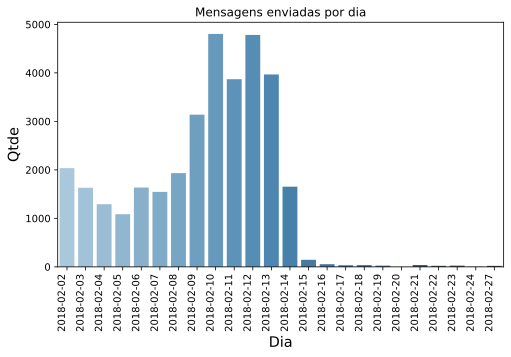

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
fig.autofmt_xdate(rotation=90)
plt.title('Mensagens enviadas por dia')
ax = sns.barplot(x=df_messages_day.index,y='QTDE',data=df_messages_day,palette="Blues_d")
ax.set_xlabel('Dia',size='x-large')
ax.set_ylabel('Qtde', size='x-large')
plt.show()

O Carnaval em 2018 foi de 9 a 14 de fevereiro, podemos observar que o volume de utilização foi maior dentro deste período.

In [ ]:
df_messages_bot = df_messages[df_messages.MessageOriginator=='Bot']
df_messages_bot.head(10)

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator,StorageDateDateTime
1,73722,2018-02-02 13:52:00.92 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,"E ai Alan Pierre, o carnaval de BH já começou 🎉 🎭",Bot,2018-02-02 13:52:00.920
2,73723,2018-02-02 13:52:03.90 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,"Se você não sabe onde ir, posso te ajudar com ...",Bot,2018-02-02 13:52:03.900
4,73729,2018-02-02 13:52:12.07 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,🎵 Você pensa que cachaça é água?\nCachaça não ...,Bot,2018-02-02 13:52:12.070
5,73730,2018-02-02 13:52:13.07 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,"Beber pode? Claro que pode!! Se for catuaçaÍ, ...",Bot,2018-02-02 13:52:13.070
6,73732,2018-02-02 13:52:17.26 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,Tenho essas opções para te ajudar a encontrar ...,Bot,2018-02-02 13:52:17.260
9,73740,2018-02-02 13:52:36.57 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,Dê uma olhada em alguns bairros que vão ter bl...,Bot,2018-02-02 13:52:36.570
10,73795,2018-02-02 13:52:46.18 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,Olha os blocos que encontrei para vc 👀,Bot,2018-02-02 13:52:46.180
12,73804,2018-02-02 13:53:03.08 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,Meu nome é Bonifácio.,Bot,2018-02-02 13:53:03.080
13,73806,2018-02-02 13:53:05.03 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,"Mas pra vc eu sou facin, facin. 😉😘",Bot,2018-02-02 13:53:05.030
15,73812,2018-02-02 13:53:15.66 -02:00,carnabelo@msging.net,1454345038013757@messenger.gw.msging.net,Vai alongar a folia de maneira mais quente🔥? N...,Bot,2018-02-02 13:53:15.660


In [ ]:
#Mensagens enviadas pelo Bot
df_messages_bot.Message.value_counts().head(10)

Olha os blocos que encontrei para vc 👀                                                   1358
A cidade toda vai bombar!                                                                1351
 Em qual bloco vc vai? 👇                                                                 1136
Se você não sabe onde ir, posso te ajudar com isso.                                      1100
Tenho essas opções para te ajudar a encontrar um bloquinho de carnaval⬇\n                1024
 Dê uma olhada em alguns bairros que vão ter blocos.👇 \n                                  679
Diz aí... qual bairro você quer curtir os blocos?👇  \n                                    670
Bora tirar uma selfie?\nJunta a galera e me manda uma foto pra vc ver uma mágica  ✨ 📷     363
Não existe época melhor para dançar e se divertir com sua família e amigos.               335
Dá uma olhada no que encontrei para você 👀                                                323
Name: Message, dtype: int64

In [ ]:
##Quantidade de eventos gerados
df_events['OwnerIdentity'].value_counts()

carnabelo@msging.net    52900
Name: OwnerIdentity, dtype: int64

Os eventos não estão sendo mapeados por usuário, não possibilitando uma análise aprofundada da reação do usuário ao receber uma mensagen do Chatbot.


####Fluxo conversa

In [ ]:
df_messages.query('FromIdentity=="1775489765818948@messenger.gw.msging.net" or ToIdentity=="1775489765818948@messenger.gw.msging.net"').tail(50)

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator,StorageDateDateTime,StorageDateDay
18279,292239,2018-02-10 20:10:16.20 -02:00,1775489765818948@messenger.gw.msging.net,carnabelo@msging.net,📅 Agenda,User,2018-02-10 20:10:16.200,2018-02-10
18280,292242,2018-02-10 20:10:25.84 -02:00,1775489765818948@messenger.gw.msging.net,carnabelo@msging.net,11/02/2018,User,2018-02-10 20:10:25.840,2018-02-10
18281,292244,2018-02-10 20:10:27.26 -02:00,carnabelo@msging.net,1775489765818948@messenger.gw.msging.net,A cidade toda vai bombar!,Bot,2018-02-10 20:10:27.260,2018-02-10
18282,292246,2018-02-10 20:10:28.28 -02:00,carnabelo@msging.net,1775489765818948@messenger.gw.msging.net,Dê uma olhada em alguns bairros que vão ter b...,Bot,2018-02-10 20:10:28.280,2018-02-10
18283,292251,2018-02-10 20:10:40.30 -02:00,carnabelo@msging.net,1775489765818948@messenger.gw.msging.net,Não tenho dúvidas que vai dar para curtir mui...,Bot,2018-02-10 20:10:40.300,2018-02-10
18284,292253,2018-02-10 20:10:41.31 -02:00,carnabelo@msging.net,1775489765818948@messenger.gw.msging.net,Olha os blocos que encontrei para vc 👀,Bot,2018-02-10 20:10:41.310,2018-02-10
18285,292258,2018-02-10 20:10:55.67 -02:00,carnabelo@msging.net,1775489765818948@messenger.gw.msging.net,Parece que vai rolar muita coisa boa no Centro,Bot,2018-02-10 20:10:55.670,2018-02-10
18286,292260,2018-02-10 20:10:56.69 -02:00,carnabelo@msging.net,1775489765818948@messenger.gw.msging.net,Em qual bloco vc vai? 👇,Bot,2018-02-10 20:10:56.690,2018-02-10
18287,292263,2018-02-10 20:11:14.48 -02:00,1775489765818948@messenger.gw.msging.net,carnabelo@msging.net,Abacaxi,User,2018-02-10 20:11:14.480,2018-02-10
18288,292265,2018-02-10 20:11:17.61 -02:00,carnabelo@msging.net,1775489765818948@messenger.gw.msging.net,Dá uma olhada no que encontrei para você 👀,Bot,2018-02-10 20:11:17.610,2018-02-10


####Engajamento

In [ ]:
##Mensagens enviadas pelo usuário com maior interação
df_messages_user_top = df_messages.query('FromIdentity=="2132001316817479@messenger.gw.msging.net" or ToIdentity=="2132001316817479@messenger.gw.msging.net"')
df_messages_user_top.sort_values('StorageDateDateTime',ascending=True).head(50)

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator,StorageDateDateTime,StorageDateDay
16,73885,2018-02-02 14:01:20.53 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,oi,User,2018-02-02 14:01:20.530,2018-02-02
17,73887,2018-02-02 14:01:23.94 -02:00,carnabelo@msging.net,2132001316817479@messenger.gw.msging.net,Boa tarde! 😃,Bot,2018-02-02 14:01:23.940,2018-02-02
19,73890,2018-02-02 14:01:25.08 -02:00,carnabelo@msging.net,2132001316817479@messenger.gw.msging.net,Já estou em clima de carnaval 🎉😎,Bot,2018-02-02 14:01:25.080,2018-02-02
20,73893,2018-02-02 14:01:26.30 -02:00,carnabelo@msging.net,2132001316817479@messenger.gw.msging.net,"Vem comigo, que vc vai se dar bem. #CaiNaFoliaBH",Bot,2018-02-02 14:01:26.300,2018-02-02
84,74400,2018-02-02 14:24:55.93 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,meus blocos,User,2018-02-02 14:24:55.930,2018-02-02
91,74484,2018-02-02 14:29:38.71 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,📅 Agenda,User,2018-02-02 14:29:38.710,2018-02-02
93,74490,2018-02-02 14:29:45.06 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,📍 Mais próximo,User,2018-02-02 14:29:45.060,2018-02-02
95,74500,2018-02-02 14:29:53.92 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,Hoje,User,2018-02-02 14:29:53.920,2018-02-02
96,74502,2018-02-02 14:29:55.87 -02:00,carnabelo@msging.net,2132001316817479@messenger.gw.msging.net,"Isso ai!!! 😀\nNão perca tempo, pq o bloco ja e...",Bot,2018-02-02 14:29:55.870,2018-02-02
144,74767,2018-02-02 14:38:57.76 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,ahuahuahuh,User,2018-02-02 14:38:57.760,2018-02-02


In [ ]:
df_messages_user_top.shape

(1465, 8)

In [ ]:
##Mensagens enviadas pelo usuário com a seguenda maior interação
df_messages_user_top2 = df_messages.query('FromIdentity=="1767958763279497@messenger.gw.msging.net" or ToIdentity=="1767958763279497@messenger.gw.msging.net"')
df_messages_user_top2.sort_values('StorageDateDateTime',ascending=True).head(50)

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator,StorageDateDateTime,StorageDateDay
23,73901,2018-02-02 14:01:32.12 -02:00,1767958763279497@messenger.gw.msging.net,carnabelo@msging.net,Opa,User,2018-02-02 14:01:32.120,2018-02-02
24,73904,2018-02-02 14:01:33.98 -02:00,carnabelo@msging.net,1767958763279497@messenger.gw.msging.net,Boa tarde! 😃,Bot,2018-02-02 14:01:33.980,2018-02-02
25,73907,2018-02-02 14:01:35.09 -02:00,carnabelo@msging.net,1767958763279497@messenger.gw.msging.net,Já estou em clima de carnaval 🎉😎,Bot,2018-02-02 14:01:35.090,2018-02-02
26,73910,2018-02-02 14:01:36.31 -02:00,carnabelo@msging.net,1767958763279497@messenger.gw.msging.net,Olha o que separei para vc aproveitar o máxim...,Bot,2018-02-02 14:01:36.310,2018-02-02
29,73921,2018-02-02 14:01:58.05 -02:00,1767958763279497@messenger.gw.msging.net,carnabelo@msging.net,MenuHoje,User,2018-02-02 14:01:58.050,2018-02-02
30,73925,2018-02-02 14:01:59.89 -02:00,carnabelo@msging.net,1767958763279497@messenger.gw.msging.net,"Isso ai!!! 😀\nNão perca tempo, pq o bloco ja e...",Bot,2018-02-02 14:01:59.890,2018-02-02
44,74086,2018-02-02 14:09:45.60 -02:00,carnabelo@msging.net,1767958763279497@messenger.gw.msging.net,"O bloco o Bloco do Pirulito, já está na rua!!!",Bot,2018-02-02 14:09:45.600,2018-02-02
45,74088,2018-02-02 14:09:46.60 -02:00,carnabelo@msging.net,1767958763279497@messenger.gw.msging.net,Vem pra folia boa!!! 🎉,Bot,2018-02-02 14:09:46.600,2018-02-02
47,74098,2018-02-02 14:10:09.45 -02:00,1767958763279497@messenger.gw.msging.net,carnabelo@msging.net,Menu,User,2018-02-02 14:10:09.450,2018-02-02
48,74102,2018-02-02 14:10:14.90 -02:00,1767958763279497@messenger.gw.msging.net,carnabelo@msging.net,MenuEnviarLocal,User,2018-02-02 14:10:14.900,2018-02-02


Nuvem de plavaras baseada na quantidade de palavras utilizada nas mensagens enviadas pelos usuários.

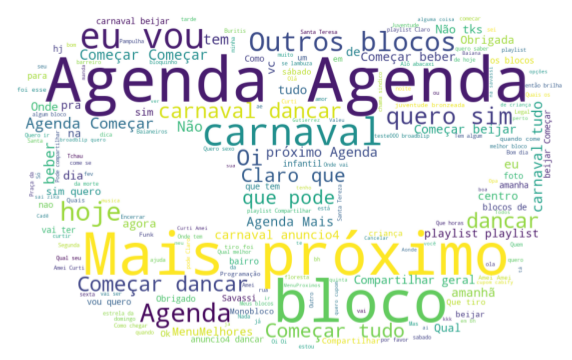

In [ ]:
STOPWORDS = ['MenuAgenda','ads','bot','MenuHoje','Menu','MenuEnviarLocal','Nome','anuncio2','anuncio3','MenuMeusBlocos','MenuDicas'] + list(STOPWORDS)
mask = np.array(Image.open('/gdrive/My Drive/Chatbot-CaiNaFolia/mascara.jpg')) 
df_messages_user.Message
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', mask=mask).generate(' '.join(df_messages_user.Message))
plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

####Análise do feedback dos usuários

In [ ]:
df_messages[df_messages.Message=='Anotado. ']

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator,StorageDateDateTime
7975,198569,2018-02-07 11:02:45.44 -02:00,carnabelo@msging.net,2132001316817479@messenger.gw.msging.net,Anotado.,Bot,2018-02-07 11:02:45.440
24705,343854,2018-02-12 12:25:33.72 -02:00,carnabelo@msging.net,1821003841267255@messenger.gw.msging.net,Anotado.,Bot,2018-02-12 12:25:33.720


In [ ]:
##Filtro do recebimento do feedback
df_messages[df_messages.Message=='Anotado. '][['ToIdentity','StorageDateDateTime']]


,ToIdentity,StorageDateDateTime
7975,2132001316817479@messenger.gw.msging.net,2018-02-07 11:02:45.440
24705,1821003841267255@messenger.gw.msging.net,2018-02-12 12:25:33.720


####Questões

1. O que os usuários buscavam no Chatbot? Acessavam o Chatbot com qual objetivo?
</br>
R. Procuraam a programação principalmente do dia corrente.

In [ ]:
df_messages_user_messages = df_messages_user['Message'].value_counts()
df_messages_user_messages.head(20)

MenuHoje            892
📅 Agenda            875
MenuAgenda          716
Começar             548
10/02/2018          354
dancar              340
11/02/2018          311
MenuEnviarLocal     259
12/02/2018          254
#NOME?              253
tudo                235
📍 Mais próximo      231
Menu                225
13/02/2018          223
MenuMeusBlocos      211
eu vou              194
ads-bot-carnaval    189
Outros blocos       176
09/02/2018          168
MenuDicas           160
Name: Message, dtype: int64

2. Quais as tendências de comportamento? O
que te chamou a atenção com relação à utilização da plataforma pelos usuários?
R. O que me chamou a atenção foi mensagens enviadas solicitando o cancelamento, não é possível identificar se foi realizado, porém isso se repetiu várias vezes.

In [ ]:
df_messages_user_top.query('MessageSequentialID>="187836"').sort_values('MessageSequentialID').head(50)

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator,StorageDateDateTime,StorageDateDay
7596,187836,2018-02-06 22:44:31.01 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,nao quero mais receber mensagens automaticas,User,2018-02-06 22:44:31.010,2018-02-06
7597,187838,2018-02-06 22:44:33.45 -02:00,carnabelo@msging.net,2132001316817479@messenger.gw.msging.net,"Desculpe, Alan Pierre",Bot,2018-02-06 22:44:33.450,2018-02-06
7598,187841,2018-02-06 22:44:39.96 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,🚫 Cancelar alertas,User,2018-02-06 22:44:39.960,2018-02-06
7599,187843,2018-02-06 22:44:41.32 -02:00,carnabelo@msging.net,2132001316817479@messenger.gw.msging.net,😊,Bot,2018-02-06 22:44:41.320,2018-02-06
7605,187868,2018-02-06 22:46:14.64 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,cancelar,User,2018-02-06 22:46:14.640,2018-02-06
7606,187870,2018-02-06 22:46:17.02 -02:00,carnabelo@msging.net,2132001316817479@messenger.gw.msging.net,👋,Bot,2018-02-06 22:46:17.020,2018-02-06
7607,187875,2018-02-06 22:47:25.44 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,me tire desta lista,User,2018-02-06 22:47:25.440,2018-02-06
7608,187878,2018-02-06 22:47:28.06 -02:00,carnabelo@msging.net,2132001316817479@messenger.gw.msging.net,"Desculpe, Alan Pierre",Bot,2018-02-06 22:47:28.060,2018-02-06
7609,187880,2018-02-06 22:47:32.13 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,🚫 Cancelar alertas,User,2018-02-06 22:47:32.130,2018-02-06
7610,187883,2018-02-06 22:47:33.36 -02:00,carnabelo@msging.net,2132001316817479@messenger.gw.msging.net,😌,Bot,2018-02-06 22:47:33.360,2018-02-06


Erro na ferramenta 180172

##Insights e Melhorias

1. A inclusão da identificação do usuário que gerou o evento para possibilitar o mapeamento da reação do usuário ao receber uma mensagem do chat bot por exemplo.

2. A maneira de interação do Chatbot não está sendo de forma natural, pois dependendo da entrada do usuário o Chat simplesmente ignora e envia uma nova mensagem, fora de contexto. Implementação de uma inteligência artificial para uma resposta mais coerente a entrada de dados do usuário.


3. Envios de mensagens mais diretas. Sem muitas frases sequênciais. No exemplo abaixo a praticamente cada interação do usuário tem entre 3 e 4 frases.



In [ ]:
df_messages_user_top2.head(20)

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator,StorageDateDateTime,StorageDateDay
23,73901,2018-02-02 14:01:32.12 -02:00,1767958763279497@messenger.gw.msging.net,carnabelo@msging.net,Opa,User,2018-02-02 14:01:32.120,2018-02-02
24,73904,2018-02-02 14:01:33.98 -02:00,carnabelo@msging.net,1767958763279497@messenger.gw.msging.net,Boa tarde! 😃,Bot,2018-02-02 14:01:33.980,2018-02-02
25,73907,2018-02-02 14:01:35.09 -02:00,carnabelo@msging.net,1767958763279497@messenger.gw.msging.net,Já estou em clima de carnaval 🎉😎,Bot,2018-02-02 14:01:35.090,2018-02-02
26,73910,2018-02-02 14:01:36.31 -02:00,carnabelo@msging.net,1767958763279497@messenger.gw.msging.net,Olha o que separei para vc aproveitar o máxim...,Bot,2018-02-02 14:01:36.310,2018-02-02
29,73921,2018-02-02 14:01:58.05 -02:00,1767958763279497@messenger.gw.msging.net,carnabelo@msging.net,MenuHoje,User,2018-02-02 14:01:58.050,2018-02-02
30,73925,2018-02-02 14:01:59.89 -02:00,carnabelo@msging.net,1767958763279497@messenger.gw.msging.net,"Isso ai!!! 😀\nNão perca tempo, pq o bloco ja e...",Bot,2018-02-02 14:01:59.890,2018-02-02
44,74086,2018-02-02 14:09:45.60 -02:00,carnabelo@msging.net,1767958763279497@messenger.gw.msging.net,"O bloco o Bloco do Pirulito, já está na rua!!!",Bot,2018-02-02 14:09:45.600,2018-02-02
45,74088,2018-02-02 14:09:46.60 -02:00,carnabelo@msging.net,1767958763279497@messenger.gw.msging.net,Vem pra folia boa!!! 🎉,Bot,2018-02-02 14:09:46.600,2018-02-02
47,74098,2018-02-02 14:10:09.45 -02:00,1767958763279497@messenger.gw.msging.net,carnabelo@msging.net,Menu,User,2018-02-02 14:10:09.450,2018-02-02
48,74102,2018-02-02 14:10:14.90 -02:00,1767958763279497@messenger.gw.msging.net,carnabelo@msging.net,MenuEnviarLocal,User,2018-02-02 14:10:14.900,2018-02-02


4. Adicionar uma ação para chamar a interação o usuário em caso de não resposta em um tempo médio, percebe-se que os usuários em determinado momento param de se comunicar e a conversa 'finaliza'. A fim de manter o engajamento dos usuários.

5. Mapear as preferências dos usuários e direcioná-los para localização dos lugares e produtos de desejo.

6. Possibilitar o comando de encerramento do recebimento via mensagem ex. o usuário 2132001316817479 solicitou várias vezes o encerramento.

In [ ]:
df_messages_user_top.query('MessageSequentialID>="187836"').sort_values('MessageSequentialID').head(50)

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator,StorageDateDateTime,StorageDateDay
7596,187836,2018-02-06 22:44:31.01 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,nao quero mais receber mensagens automaticas,User,2018-02-06 22:44:31.010,2018-02-06
7597,187838,2018-02-06 22:44:33.45 -02:00,carnabelo@msging.net,2132001316817479@messenger.gw.msging.net,"Desculpe, Alan Pierre",Bot,2018-02-06 22:44:33.450,2018-02-06
7598,187841,2018-02-06 22:44:39.96 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,🚫 Cancelar alertas,User,2018-02-06 22:44:39.960,2018-02-06
7599,187843,2018-02-06 22:44:41.32 -02:00,carnabelo@msging.net,2132001316817479@messenger.gw.msging.net,😊,Bot,2018-02-06 22:44:41.320,2018-02-06
7605,187868,2018-02-06 22:46:14.64 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,cancelar,User,2018-02-06 22:46:14.640,2018-02-06
7606,187870,2018-02-06 22:46:17.02 -02:00,carnabelo@msging.net,2132001316817479@messenger.gw.msging.net,👋,Bot,2018-02-06 22:46:17.020,2018-02-06
7607,187875,2018-02-06 22:47:25.44 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,me tire desta lista,User,2018-02-06 22:47:25.440,2018-02-06
7608,187878,2018-02-06 22:47:28.06 -02:00,carnabelo@msging.net,2132001316817479@messenger.gw.msging.net,"Desculpe, Alan Pierre",Bot,2018-02-06 22:47:28.060,2018-02-06
7609,187880,2018-02-06 22:47:32.13 -02:00,2132001316817479@messenger.gw.msging.net,carnabelo@msging.net,🚫 Cancelar alertas,User,2018-02-06 22:47:32.130,2018-02-06
7610,187883,2018-02-06 22:47:33.36 -02:00,carnabelo@msging.net,2132001316817479@messenger.gw.msging.net,😌,Bot,2018-02-06 22:47:33.360,2018-02-06
